In [69]:
import numpy as np
import pandas as pd

from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, auc

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, InputLayer, Dropout
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt

In [70]:
# Reading the dataset
data_csv = "../data/dataset.csv"
df = pd.read_csv(data_csv)
print('Dataset shape: ', df.shape)
print(df.dtypes)
df.head()

Dataset shape:  (1176, 7)
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-14,12.4000,12.40,12.26,12.4000,12.4000,74938.0
1,2019-08-15,12.3800,12.47,12.38,12.4000,12.4000,18754.0
2,2019-08-18,12.4000,12.50,12.50,12.5000,12.5000,2332.0
3,2019-08-19,12.5000,12.48,12.35,12.3746,12.3746,23745.0
4,2019-08-20,12.3746,12.37,12.33,12.3300,12.3300,212351.0


In [71]:
# Verifying null values and deleting name from dataset
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head())
# Drop the lines with null values
df = df.dropna()

print('Dataset shape: ', df.shape)

     Open  High  Low  Close  Adj Close  Volume
72    NaN   NaN  NaN    NaN        NaN     NaN
457   NaN   NaN  NaN    NaN        NaN     NaN
467   NaN   NaN  NaN    NaN        NaN     NaN
501   NaN   NaN  NaN    NaN        NaN     NaN
513   NaN   NaN  NaN    NaN        NaN     NaN
Dataset shape:  (1144, 7)


In [72]:
print("Minimum: {}\nMaximum: {}\nMean: {}\nMedian: {}\nSD: {}\nSkewness: {}\nKurtosis: {}".format(df["Low"].min(), df["High"].max(), 
df["Open"].mean(), df["Open"].median(), df["Open"].std(), df["Open"].skew(), df["Open"].kurtosis()))

Minimum: 11.65
Maximum: 19.941999
Mean: 14.230973513111886
Median: 13.8269
SD: 1.6454705048232097
Skewness: 1.0012988186754024
Kurtosis: 0.6677055658188862


In [73]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

NumCols = df.columns.drop(['Date'])
df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
df[NumCols] = df[NumCols].astype('float64')

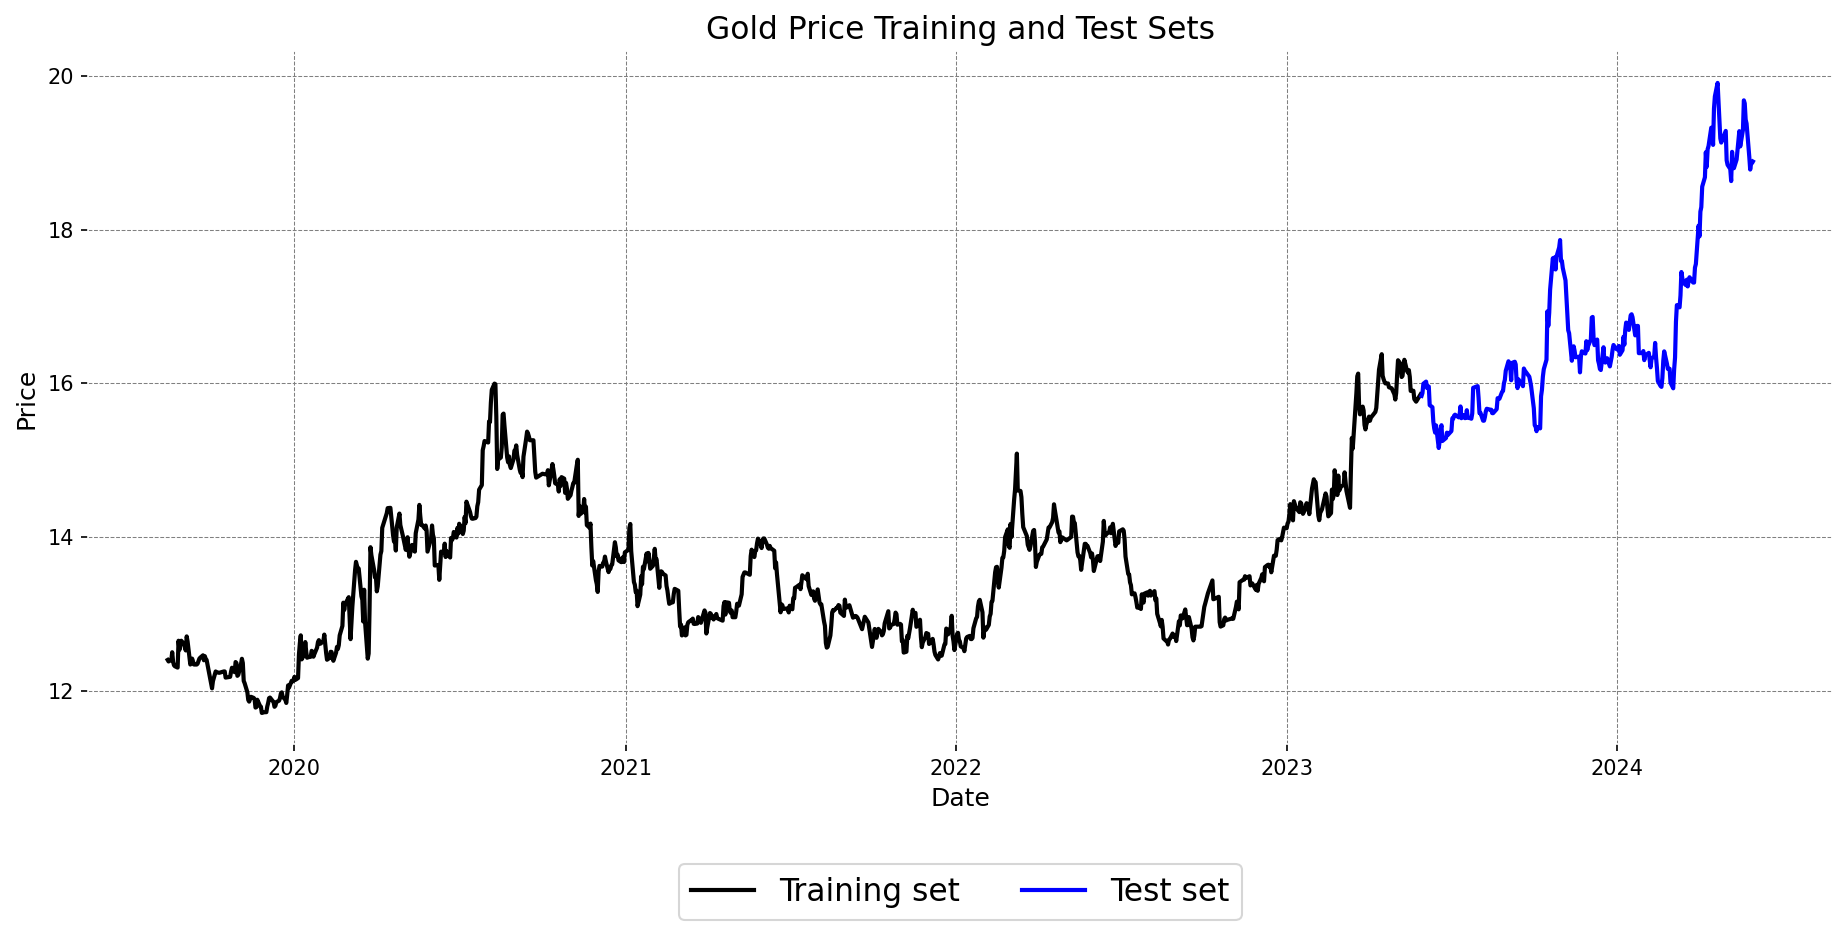

In [74]:
# test_size = df[df.Date.dt.year==2023].shape[0]
test_size = df.loc[df["Date"]=="2023-05-30"].index.values[0]

plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df.Date[:test_size], df.Open[:test_size], color='black', lw=2)
plt.plot(df.Date[test_size:], df.Open[test_size:], color='blue', lw=2)
plt.title('Gold Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper center',bbox_to_anchor=(0.5, -0.15), ncol=2, prop={'size': 15})
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('../../img/gold_price.png', bbox_inches='tight')

plt.show()

In [41]:
df = df["Open"].values
df = np.log(df)

In [42]:
# Split dataset into train and test
train_set = df[0:test_size]
test_set = df[test_size:]
print("Train: ", train_set.shape, "Test: ", test_set.shape)
test_size

Train:  (902,) Test:  (242,)


902

In [54]:
df = df.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df = df.flatten()
df

array([0.10784716, 0.10480651, 0.10784716, ..., 0.898763  , 0.89853339,
       0.90061861])

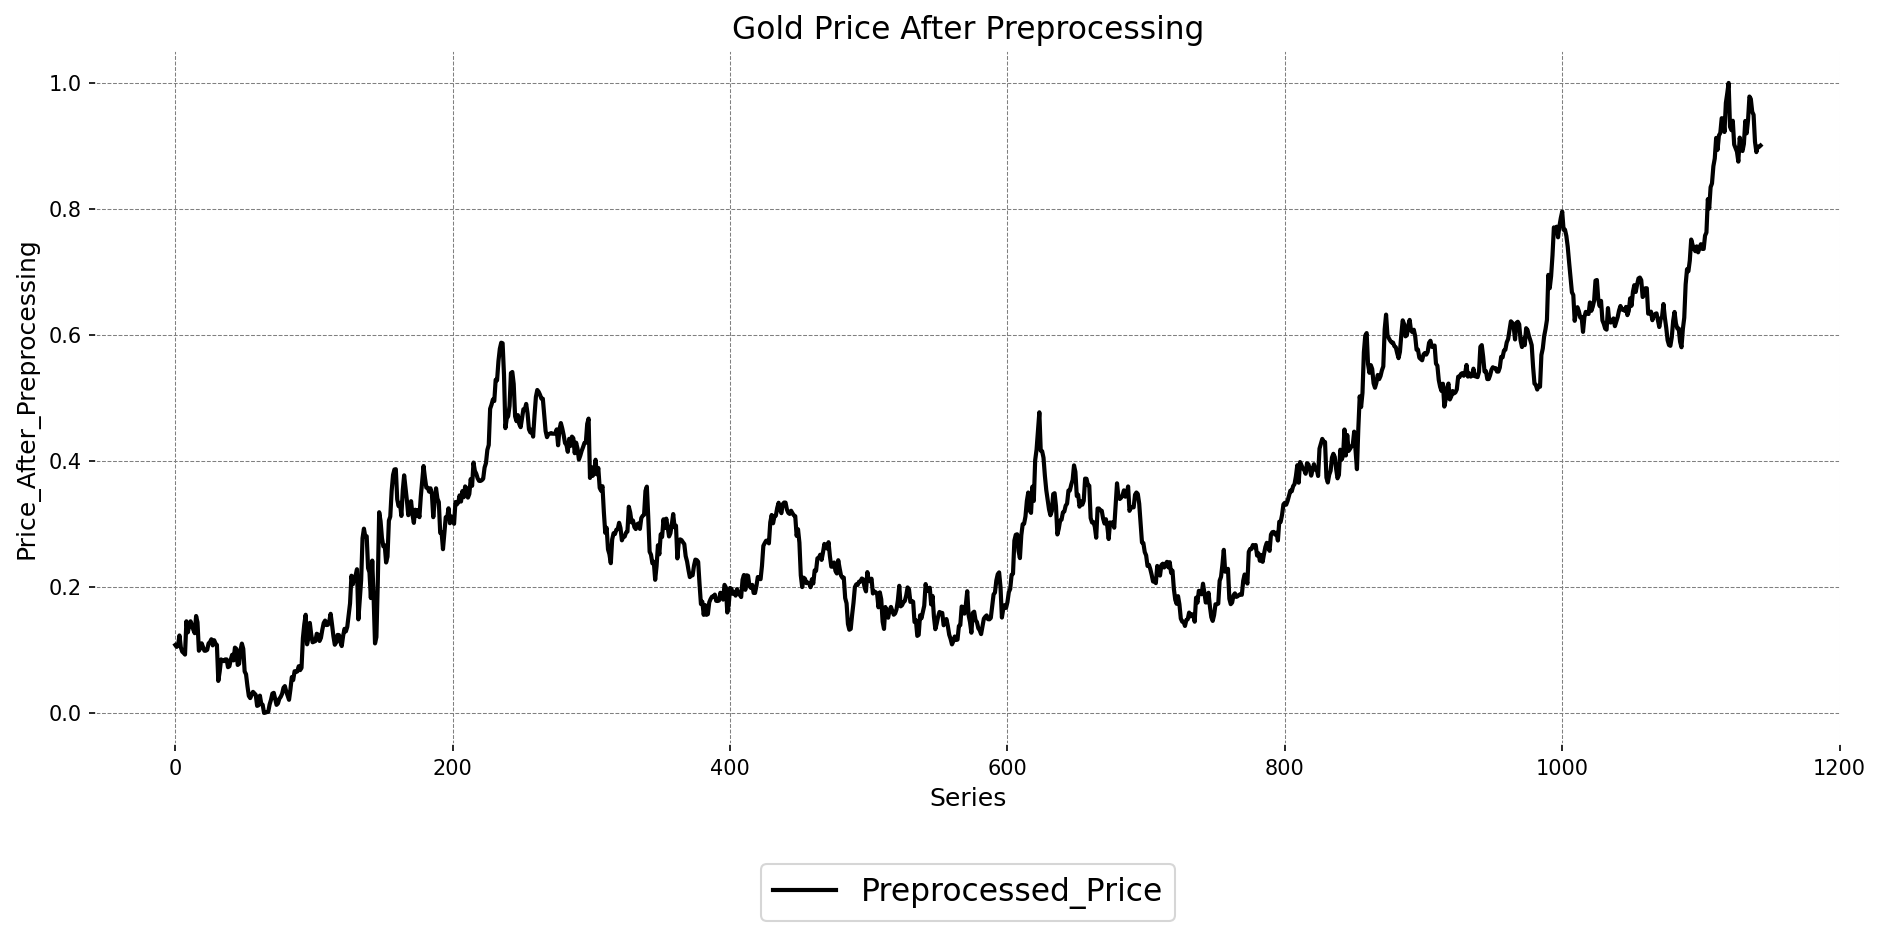

In [67]:
plt.figure(figsize=(15, 6), dpi=150)
# plt.rcParams['axes.facecolor'] = 'white'
# plt.rc('axes',edgecolor='white')
plt.plot(df, color='black', lw=2)

plt.title('Gold Price After Preprocessing', fontsize=15)
plt.xlabel('Series', fontsize=12)
plt.ylabel('Price_After_Preprocessing', fontsize=12)
plt.legend(['Preprocessed_Price'], loc='upper center',bbox_to_anchor=(0.5, -0.15), ncol=2, prop={'size': 15})
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.savefig('../../img/gold_price_after_preprocessing.png', bbox_inches='tight')

plt.show()